In [2]:
import pydpmd as dp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import numpy as np
import h5py
from tqdm import tqdm
from pydpmd.plot import draw_particles_frame

In [3]:
root = '/Users/marshallmccraw/Projects/yale/data/s-25/11-06-25/grace-data/N-100/'

for ptype in os.listdir(root):
    if '.DS_Store' in ptype:
        continue
    data = dp.data.load(os.path.join(root, ptype, 'jamming_3'), location=['final', 'init'], load_trajectory=True, load_full=True)

Loading trajectory: 100%|██████████| 9/9 [00:00<00:00, 31.13it/s]


In [6]:
data.calculate_mu_eff()
data.n_vertices_per_particle, data.mu_eff

(array([20, 20, 20, ..., 40, 40, 40], dtype=int32),
 array([0.0475154 , 0.0475154 , 0.0475154 , ..., 0.04907685, 0.04907685,
        0.04907685]))

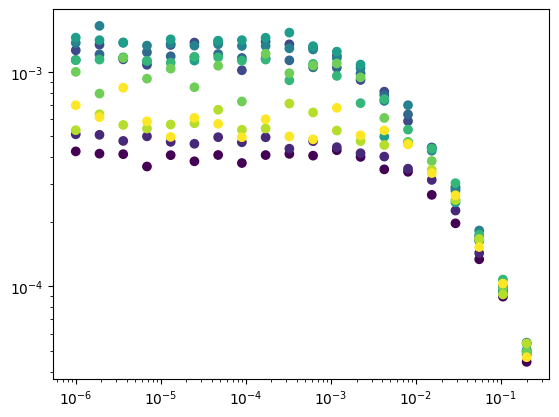

In [59]:
t0 = 500
tf = -1
P = np.mean(data.trajectory.pressure[t0:tf], axis=0)
plt.scatter(-data.delta_phi, P, c=data.original_system_id)
plt.xscale('log')
plt.yscale('log')